<a href="https://colab.research.google.com/github/ana-ddomingues/ech_ingredion_sprint2/blob/main/Sprint2_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from google.colab import drive
drive.mount('/content/drive')

ruta_archivo = '/content/drive/MyDrive/Colab Notebooks/src/DATA_TOTAL_ORIGEM2.csv'
df = pd.read_csv(ruta_archivo)

Mounted at /content/drive


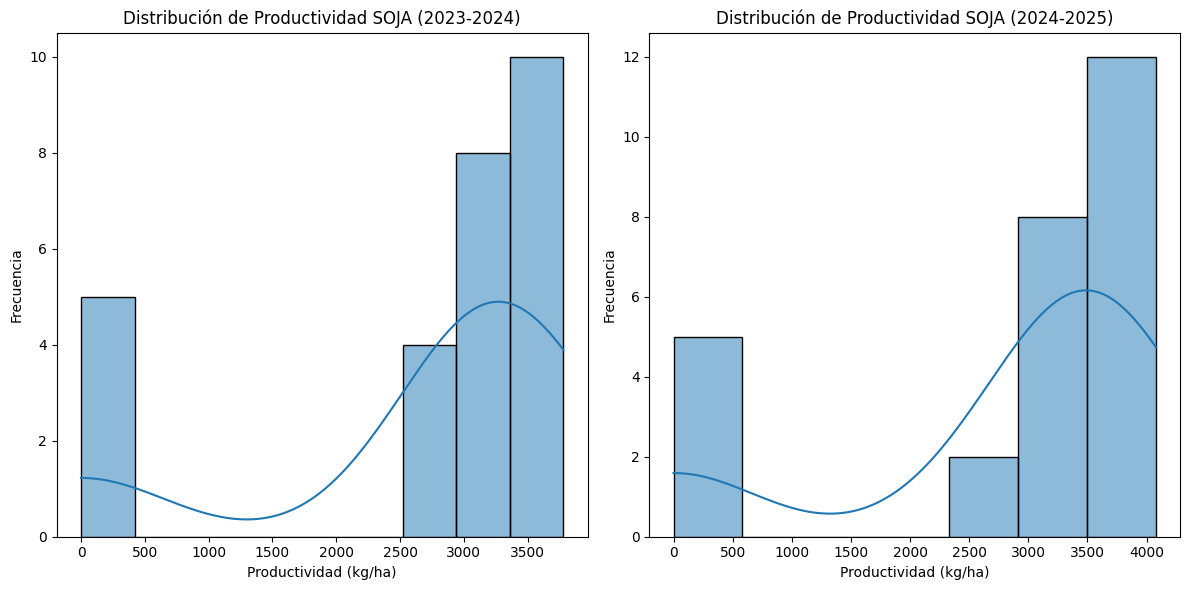

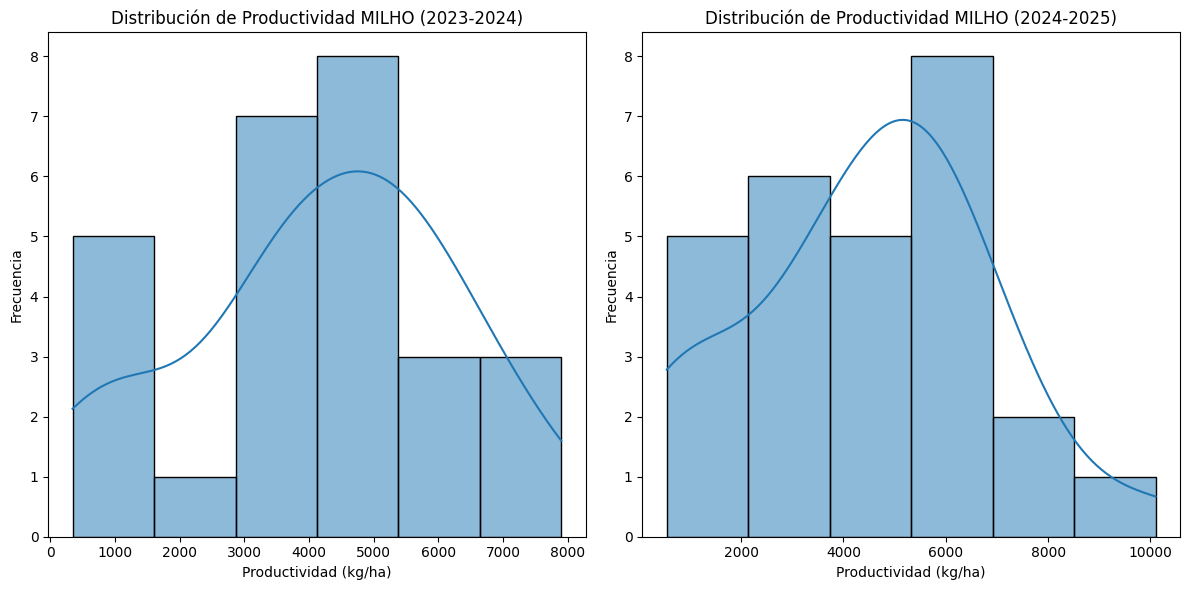

In [ ]:
# Filtrar el DataFrame para la cultura SOJA
df_soja = df[df['CULTURA'] == 'SOJA'].copy()

# Gráfico para SOJA
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df_soja['PRODU_SAFRA_23_24'], kde=True)
plt.title('Distribución de Productividad SOJA (2023-2024)')
plt.xlabel('Productividad (kg/ha)')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
sns.histplot(df_soja['PRODU_SAFRA_24_25'], kde=True)
plt.title('Distribución de Productividad SOJA (2024-2025)')
plt.xlabel('Productividad (kg/ha)')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

# Filtrar el DataFrame para la cultura MILHO
df_milho = df[df['CULTURA'] == 'MILHO'].copy()

# Gráfico para MILHO
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df_milho['PRODU_SAFRA_23_24'], kde=True)
plt.title('Distribución de Productividad MILHO (2023-2024)')
plt.xlabel('Productividad (kg/ha)')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
sns.histplot(df_milho['PRODU_SAFRA_24_25'], kde=True)
plt.title('Distribución de Productividad MILHO (2024-2025)')
plt.xlabel('Productividad (kg/ha)')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

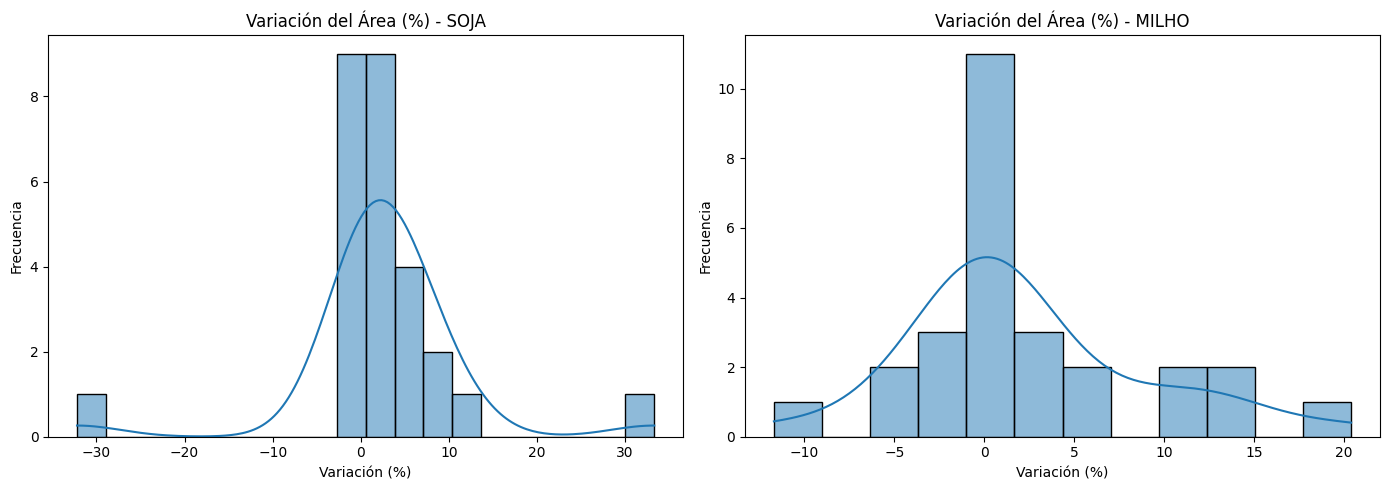

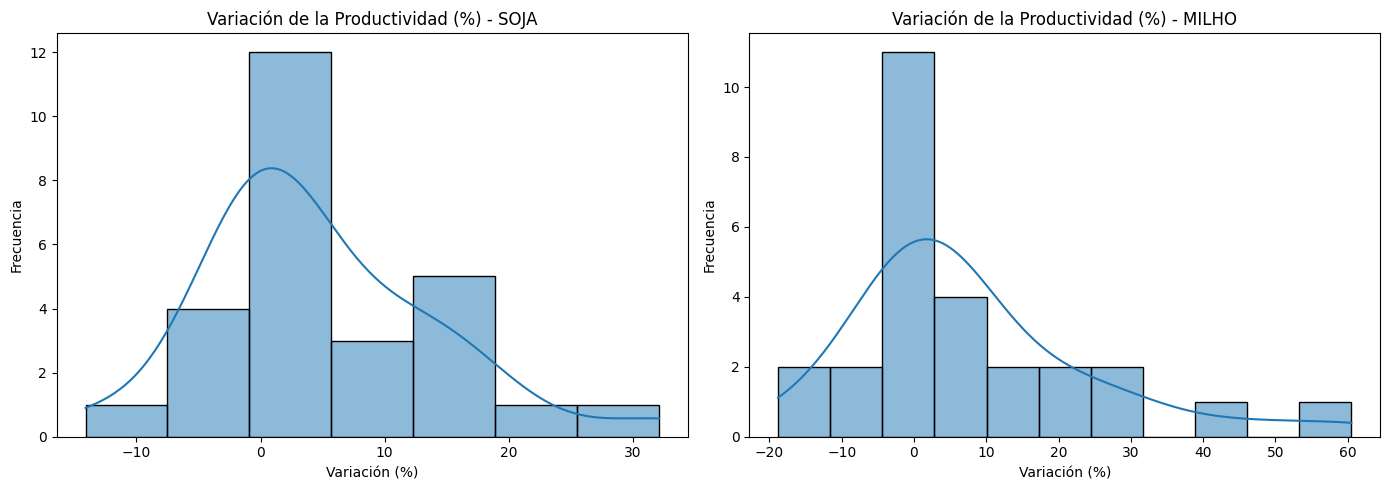

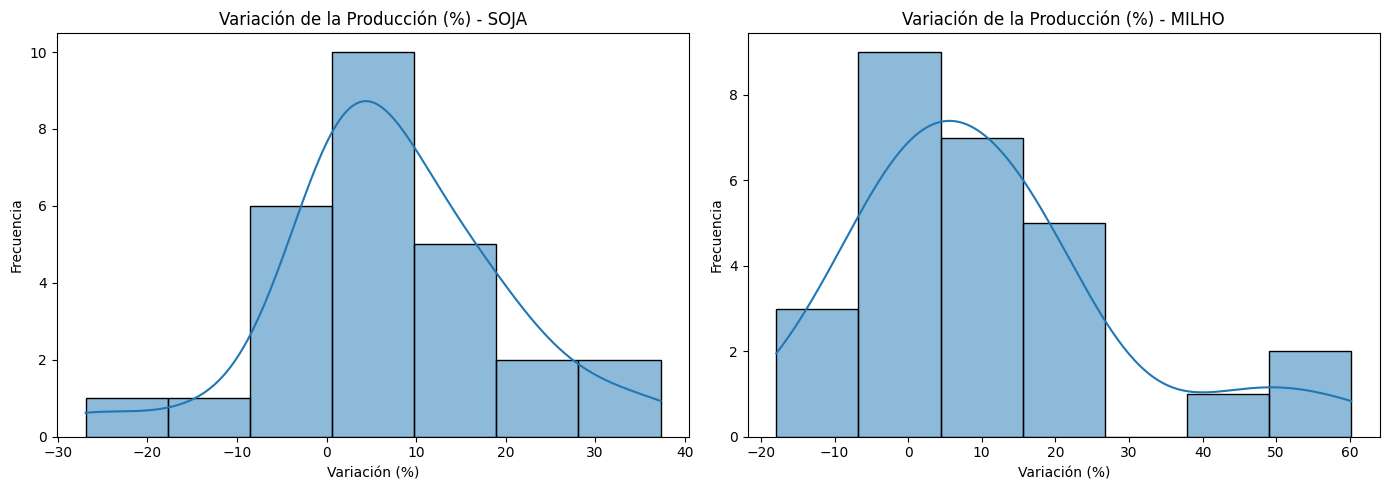

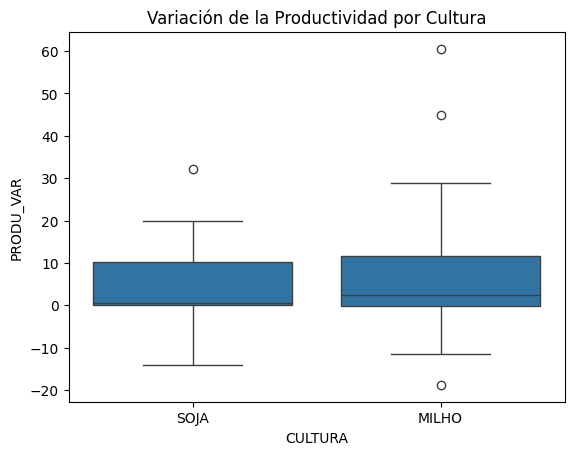

In [ ]:
#Análisis de Variación: Explorar las columnas de variación (AREA_VAR, PRODUTIVIDADE_VAR, PRODUCAO_VAR)
import matplotlib.pyplot as plt
import seaborn as sns

# --- Histogramas de Variación por Cultura ---

# Variación del Área por Cultura
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
sns.histplot(df[df['CULTURA'] == 'SOJA']['AREA_VAR'], kde=True)
plt.title('Variación del Área (%) - SOJA')
plt.xlabel('Variación (%)')
plt.ylabel('Frecuencia')
plt.subplot(1, 2, 2)
sns.histplot(df[df['CULTURA'] == 'MILHO']['AREA_VAR'], kde=True)
plt.title('Variación del Área (%) - MILHO')
plt.xlabel('Variación (%)')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

# Variación de la Productividad por Cultura
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
sns.histplot(df[df['CULTURA'] == 'SOJA']['PRODU_VAR'], kde=True)
plt.title('Variación de la Productividad (%) - SOJA')
plt.xlabel('Variación (%)')
plt.ylabel('Frecuencia')
plt.subplot(1, 2, 2)
sns.histplot(df[df['CULTURA'] == 'MILHO']['PRODU_VAR'], kde=True)
plt.title('Variación de la Productividad (%) - MILHO')
plt.xlabel('Variación (%)')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

# Variación de la Producción por Cultura
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
sns.histplot(df[df['CULTURA'] == 'SOJA']['PRODUC_VAR'], kde=True)
plt.title('Variación de la Producción (%) - SOJA')
plt.xlabel('Variación (%)')
plt.ylabel('Frecuencia')
plt.subplot(1, 2, 2)
sns.histplot(df[df['CULTURA'] == 'MILHO']['PRODUC_VAR'], kde=True)
plt.title('Variación de la Producción (%) - MILHO')
plt.xlabel('Variación (%)')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

# --- Boxplot de Variación de la Productividad por Cultura (ya lo tenías) ---
plt.figure()
sns.boxplot(x='CULTURA', y='PRODU_VAR', data=df)
plt.title('Variación de la Productividad por Cultura')
plt.show()

Error Cuadrático Medio (MSE): 2213680.67
Coeficiente de Determinación (R^2): 0.90


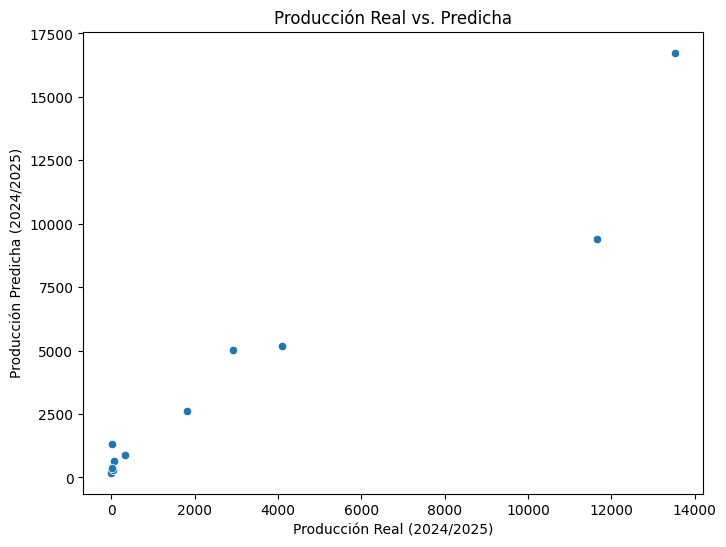

In [ ]:
# Ejemplo: Predecir la producción en 2024/2025 basándonos en datos de 2023/2024
# Seleccionar las características (X) y la variable objetivo (y)
features = ['AREA_PERIODO_23_24', 'PRODU_SAFRA_23_24']
target = 'PRODUC_SAFRA_24_25'
X = df[features]
y = df[target]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar un modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Error Cuadrático Medio (MSE): {mse:.2f}')
print(f'Coeficiente de Determinación (R^2): {r2:.2f}')

# Generar una visualización
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Producción Real (2024/2025)')
plt.ylabel('Producción Predicha (2024/2025)')
plt.title('Producción Real vs. Predicha')
plt.show()


--- Modelo Avançado (Área, Produção e Var. Prod. 23/24 para prever Produção 24/25) ---
Erro Quadrático Médio (MSE): 16956911.34
Coeficiente de Determinação (R^2): 0.36


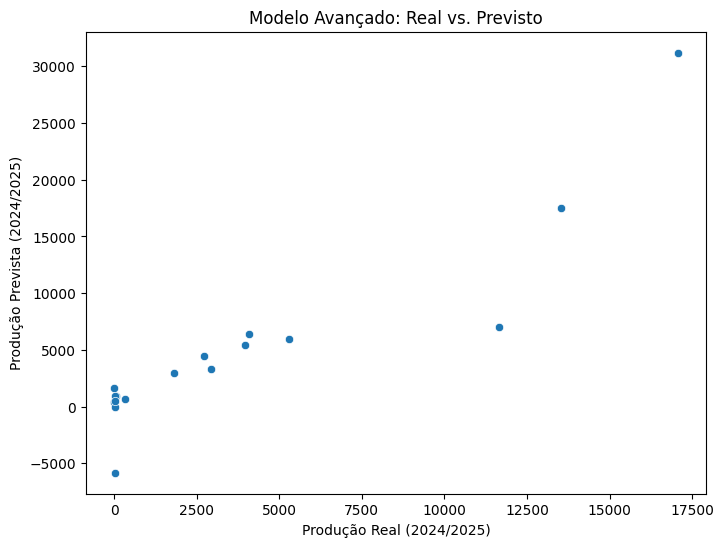

In [ ]:
# Selecionar mais características
features_advanced = ['AREA_PERIODO_23_24', 'PRODU_SAFRA_23_24', 'PRODU_VAR'] # Adicionamos a variação de produtividade
X_advanced = df[features_advanced]
y = df[target]

# Dividir os dados em treinamento e teste
X_train_adv, X_test_adv, y_train_adv, y_test_adv = train_test_split(X_advanced, y, test_size=0.3, random_state=42)

# Treinar um novo modelo de regressão linear
model_advanced = LinearRegression()
model_advanced.fit(X_train_adv, y_train_adv)

# Fazer previsões
y_pred_adv = model_advanced.predict(X_test_adv)

# Avaliar o modelo avançado
mse_adv = mean_squared_error(y_test_adv, y_pred_adv)
r2_adv = r2_score(y_test_adv, y_pred_adv)

print("\n--- Modelo Avançado (Área, Produção e Var. Prod. 23/24 para prever Produção 24/25) ---")
print(f"Erro Quadrático Médio (MSE): {mse_adv:.2f}")
print(f"Coeficiente de Determinação (R^2): {r2_adv:.2f}")

# Visualização das previsões do modelo avançado
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_adv, y=y_pred_adv)
plt.xlabel('Produção Real (2024/2025)')
plt.ylabel('Produção Prevista (2024/2025)')
plt.title('Modelo Avançado: Real vs. Previsto')
plt.show()


--- Modelo Avançado (Área, Produção e Var. Prod. 23/24 para prever Produção 24/25) ---
Erro Quadrático Médio (MSE): 16956911.34
Coeficiente de Determinação (R^2): 0.36


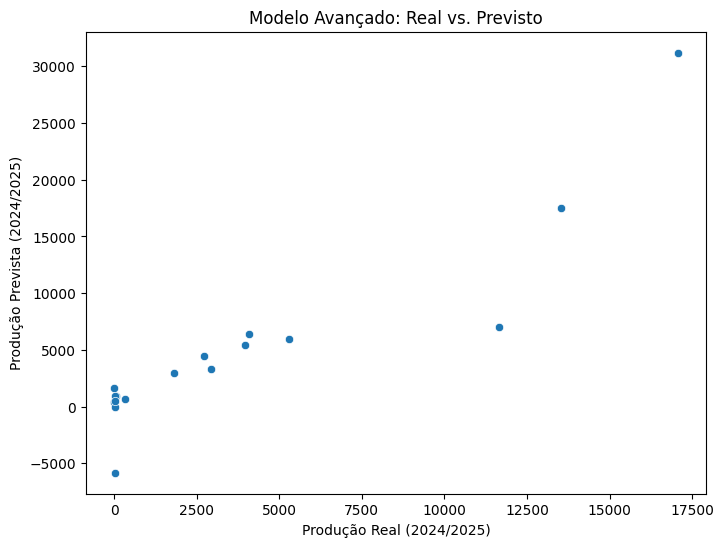

In [ ]:
# Selecionar mais características
features_advanced = ['AREA_PERIODO_23_24', 'PRODU_SAFRA_23_24', 'PRODU_VAR'] # Adicionamos a variação de produtividade
X_advanced = df[features_advanced]
y = df[target]

# Dividir os dados em treinamento e teste
X_train_adv, X_test_adv, y_train_adv, y_test_adv = train_test_split(X_advanced, y, test_size=0.3, random_state=42)

# Treinar um novo modelo de regressão linear
model_advanced = LinearRegression()
model_advanced.fit(X_train_adv, y_train_adv)

# Fazer previsões
y_pred_adv = model_advanced.predict(X_test_adv)

# Avaliar o modelo avançado
mse_adv = mean_squared_error(y_test_adv, y_pred_adv)
r2_adv = r2_score(y_test_adv, y_pred_adv)

print("\n--- Modelo Avançado (Área, Produção e Var. Prod. 23/24 para prever Produção 24/25) ---")
print(f"Erro Quadrático Médio (MSE): {mse_adv:.2f}")
print(f"Coeficiente de Determinação (R^2): {r2_adv:.2f}")

# Visualização das previsões do modelo avançado
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_adv, y=y_pred_adv)
plt.xlabel('Produção Real (2024/2025)')
plt.ylabel('Produção Prevista (2024/2025)')
plt.title('Modelo Avançado: Real vs. Previsto')
plt.show()

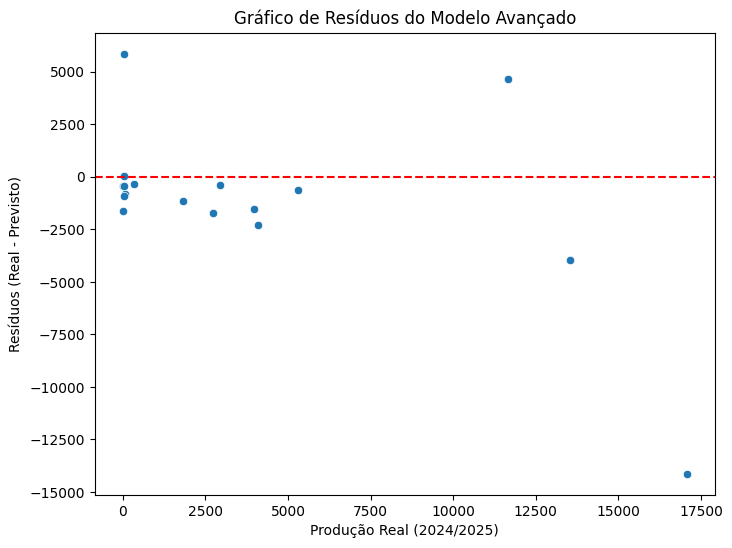

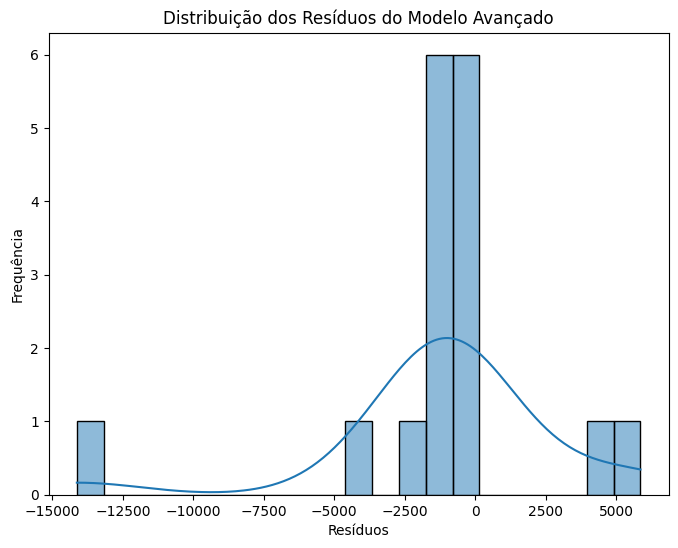


--- Métricas de Desempenho Detalhadas do Modelo Avançado ---
Erro Quadrático Médio (MSE): 16956911.34
Raiz do Erro Quadrático Médio (RMSE): 4117.88
Erro Absoluto Médio (MAE): 2405.23
Coeficiente de Determinação (R^2): 0.36


In [ ]:
# Gráfico de resíduos
residuals = y_test_adv - y_pred_adv
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_adv, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Produção Real (2024/2025)')
plt.ylabel('Resíduos (Real - Previsto)')
plt.title('Gráfico de Resíduos do Modelo Avançado')
plt.show()

# Distribuição dos resíduos
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.title('Distribuição dos Resíduos do Modelo Avançado')
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.show()

print("\n--- Métricas de Desempenho Detalhadas do Modelo Avançado ---")
print(f"Erro Quadrático Médio (MSE): {mse_adv:.2f}")
print(f"Raiz do Erro Quadrático Médio (RMSE): {mse_adv**0.5:.2f}")
print(f"Erro Absoluto Médio (MAE): {abs(residuals).mean():.2f}")
print(f"Coeficiente de Determinação (R^2): {r2_adv:.2f}")